### This notebook computes the joint likelihood in 5 dimensions for the parameters of interest (see below) from pre-computed likelihoods for individual lenses

In [2]:
from lenslikelihood.measurements import flux_measurements, flux_measurement_uncertainties, all_lens_names, all_param_ranges

# Note that the syntax for the uncertainties is
# {'lens_name': (1-sigma-uncertainty, reference_index, uncertainty_in_ratio)}
# where reference_index is the reference image with which to compute the flux ratio, and uncertainty_in_ratio specifies
# whether the measurement uncertainty refers to the flux or the flux ratio

for name in all_lens_names:
    print(name)
    print('fluxes/flux ratios measured: ', flux_measurements[name])
    print('uncertainties: ', flux_measurement_uncertainties[name])
    print('\n')

B1422
fluxes/flux ratios measured:  [0.88  1.    0.474 0.025]
uncertainties:  ([0.011363636363636364, 0.01, 0.012765957446808512, None], 0, False)


HE0435
fluxes/flux ratios measured:  [0.96  0.976 1.    0.65 ]
uncertainties:  ([0.05, 0.049, 0.048, 0.056], 0, False)


WGD2038
fluxes/flux ratios measured:  [0.86 1.   0.79 0.4 ]
uncertainties:  ([0.01, 0.01724137931034483, 0.021739130434782608, 0.021739130434782608], 0, False)


WGDJ0405
fluxes/flux ratios measured:  [0.8  0.52 1.   0.94]
uncertainties:  ([0.04, 0.061538461538461535, 0.024, 0.03418803418803419], 0, False)


WFI2033
fluxes/flux ratios measured:  [1.   0.65 0.5  0.53]
uncertainties:  ([0.03, 0.046875, 0.04, 0.03773584905660377], 0, False)


PSJ1606
fluxes/flux ratios measured:  [1.   1.   0.59 0.79]
uncertainties:  ([0.03, 0.03, 0.03333333333333333, 0.02564102564102564], 0, False)


WFI2026
fluxes/flux ratios measured:  [1.   0.75 0.31 0.28]
uncertainties:  ([0.02, 0.02666666666666667, 0.06451612903225806, 0.0357142857142

### Models implemented for the halo mass function and concentration-mass relation

The full set of hyper-parameters we're interested in constraining are defined by the parameterizations of the halo mass function and concentration-mass relation. They are $\Sigma_{\rm{sub}}$, $\delta_{\rm{LOS}}$, $\Delta \alpha$, $q$, $c_8$, and $\beta$. The first four define to the subhalo and field halo mass functions, and the last two define the concentration-mass relation. 

The field halo mass function is parameterized as
\begin{equation}
\frac{dN_{\rm{LOS}}}{dm dV} = \delta_{\rm{LOS}} \left(1+\xi_{\rm{2halo}}\right) \left(\frac{m}{10^8}\right)^{\Delta \alpha} \ \frac{dN_{\rm{ShethTormen}}}{dm dV}
\end{equation}
where $\delta_{\rm{LOS}}$ scales the overall normalization, and $\Delta \alpha$ parameterizes deviations from the logarithmic slope predicted by CDM around $10^8 M_{\odot}$. 

The subhalo mass function is parameterized as
\begin{equation}
\frac{dN_{\rm{sub}}}{dm dA} \sim \Sigma_{\rm{sub}} \ \left(\frac{m}{10^8}\right)^{\alpha + q \Delta \alpha}
\end{equation}
where $\Sigma_{\rm{sub}}$ is the normalization, $\alpha$ is the logarithmic slope predicted by CDM, $\Delta \alpha$ parameterizes deviations from the value predicted by CDM, and $q$ controls the coupling between the line of sight halo mass function slope and the subhalo mass function slope. When $q=1$ the slopes change in the same way, and when $q=0$ the slopes of the subhalo and field halo mass functions are completely decoupled. 

The concentration-mass relation is parameterized as 

\begin{equation}
c\left(M, z\right) = c_8 \left(1+z\right)^{\zeta} \left(\frac{\nu\left(M, z\right)}{\nu\left(10^8, z\right)}\right)^{-\beta}
\end{equation}
i.e. it is a power-law in the peak height $\nu$ with normalization $c_8$ at $10^8$ and a logarithmic slope $\beta$. The parameter $\zeta$ modifies the redshift evolution and is marginalized over in the sampling. 

The parameter names used in the python code have the following correspondence: 


1) sigma_sub = $\Sigma_{\rm{sub}}$

2) delta_power_law_index = $\Delta \alpha$

3) c0 = $c_8$

4) beta = $\beta$

5) delta_power_law_index_coupling = $q$

6) LOS_normalization = $\delta_{\rm{LOS}}$

Now we compute the likelihood using the package trikde https://github.com/dangilman/trikde

In [3]:
from trikde.pdfs import DensitySamples, IndepdendentLikelihoods
import os
import pickle

nbins = 20
likelihoods, likelihoods_coupled, likelihoods_decoupled, likelihoods_lowa4 = [], [], [], []

filename_extension = '_joint'
filename_extension_coupled = '_joint_coupled'
filename_extension_decoupled = '_joint_decoupled'
filename_extension_lowa4 = '_joint_lowa4'
base_path = './../lenslikelihood/precomputed_likelihoods/'
print(all_lens_names)
for lens in all_lens_names:
    
    fname = base_path + lens + filename_extension
    print('loading joint likelihoods for lens '+lens+' ...')
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods.append(single_lens_likelihood)
    
    fname = base_path + lens + filename_extension_coupled
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods_coupled.append(single_lens_likelihood)
    
    fname = base_path + lens + filename_extension_decoupled
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods_decoupled.append(single_lens_likelihood)
    
    fname = base_path + lens + filename_extension_lowa4
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods_lowa4.append(single_lens_likelihood)
    
likelihood = IndepdendentLikelihoods(likelihoods)
likelihood_coupled = IndepdendentLikelihoods(likelihoods_coupled)
likelihood_decoupled = IndepdendentLikelihoods(likelihoods_decoupled)
likelihood_lowa4 = IndepdendentLikelihoods(likelihoods_lowa4)

['B1422', 'HE0435', 'WGD2038', 'WGDJ0405', 'WFI2033', 'PSJ1606', 'WFI2026', 'RXJ0911', 'RXJ1131', 'MG0414', 'PG1115', 'B0128']
loading joint likelihoods for lens B1422 ...
loading joint likelihoods for lens HE0435 ...
loading joint likelihoods for lens WGD2038 ...
loading joint likelihoods for lens WGDJ0405 ...
loading joint likelihoods for lens WFI2033 ...
loading joint likelihoods for lens PSJ1606 ...
loading joint likelihoods for lens WFI2026 ...
loading joint likelihoods for lens RXJ0911 ...
loading joint likelihoods for lens RXJ1131 ...
loading joint likelihoods for lens MG0414 ...
loading joint likelihoods for lens PG1115 ...
loading joint likelihoods for lens B0128 ...


### The joint likelihood/posterior with no modeling assumptions (indepedent, uniform priors on all model parameters). 

This likelihood includes a marginalization over a term that couples the subhalo mass function slope to the field halo mass function slope

In [5]:
from trikde.triangleplot import TrianglePlot
triangle_plot = TrianglePlot([likelihood])
triangle_plot.set_cmap('magma')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False
                                 )
# can change axis labels

### The joint likelihood/posterior assuming the slope of the subhalo mass function tracks the slope of the field halo mass function. 

This likelihood has a Gaussian prior on q (see equation for subhalo mass function at the top of this notebook) with a mean of 1 and a variance of 0.25. 

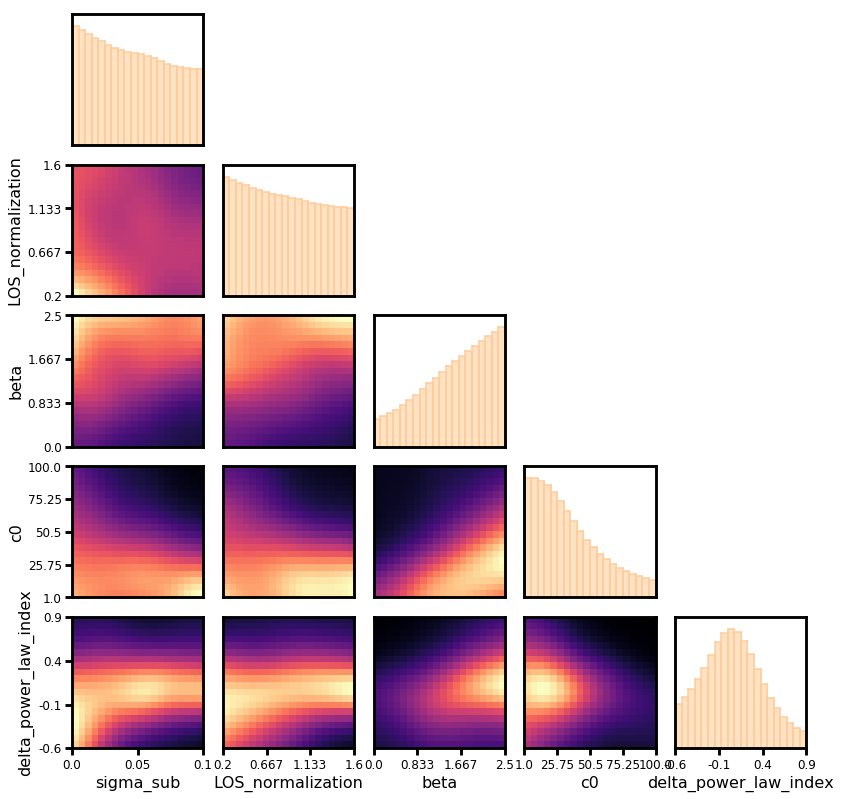

In [6]:
triangle_plot = TrianglePlot([likelihood_coupled])
triangle_plot.cmap = 'magma'
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False)
# can change axis labels

### The joint likelihood/posterior assuming the slope of the subhalo mass function is completely decoupled from the slope of the field halo mass function. 

This likelihood has a Gaussian prior on q (see equation for subhalo mass function at the top of this notebook) with a mean of 0 and a variance of 0.25. 

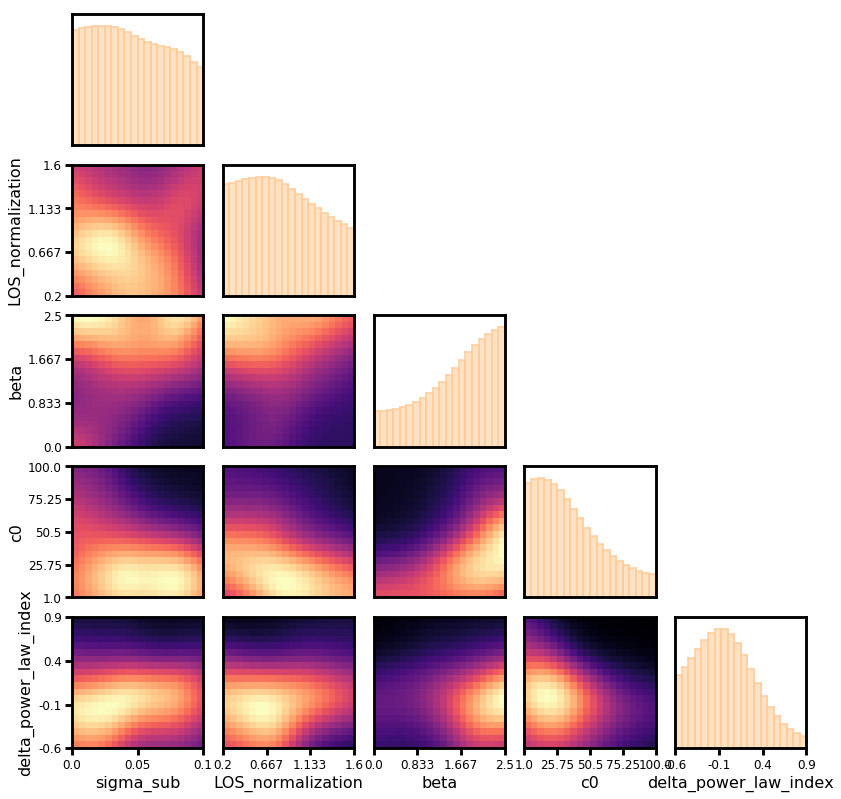

In [8]:
triangle_plot = TrianglePlot([likelihood_decoupled])
triangle_plot.cmap = 'magma'
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False)
# can change axis labels

### The effect of boxyness and diskyness

The likelihoods displayed above include a marginalization over a parameter $a_4$, which controls the boxyness and diskyness of the macromodel mass profile. We can assess what effect this has on the inference by importance sampling, selecting only realizations with low $a_4$ amplitudes. Black contours show the likelihood with a Gaussian prior on $a_4$ with a mean of 0. and a variance of 0.005, and blue contours show effect of multiplying by a new prior with a mean of 0 and a variance of 0.005. 

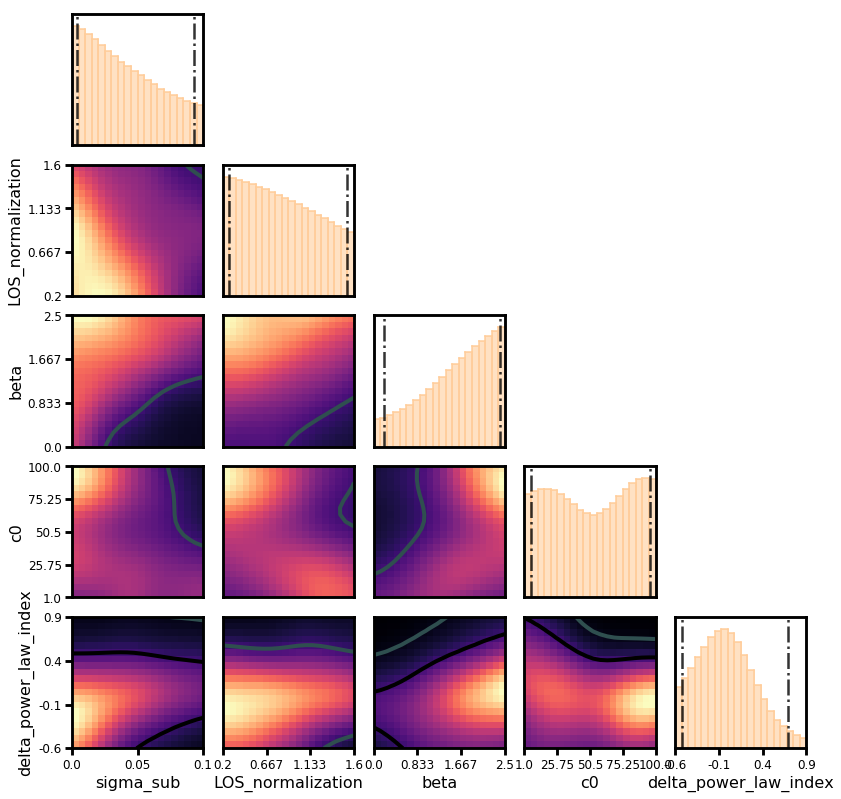

In [9]:
from trikde.triangleplot import TrianglePlot

triangle_plot = TrianglePlot([likelihood_lowa4])
triangle_plot.cmap = 'magma'
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=True, show_contours=True)
# can change axis labels